## Write-up: 
https://www.overleaf.com/read/cbstnnyqdqbc#00f296

In [56]:
import numpy as np
from sympy.physics.wigner import wigner_3j, wigner_6j
import matplotlib.pyplot as plt

In [57]:
3*3*(wigner_6j(1/2, 1, 1/2, 1, 1/2, 1))**2

1

In [58]:
def velocity_distribution(a_v):
    """
    1D Boltzmann (Gaussian) velocity distribution
    """
    
    return lambda v: 1 / (np.sqrt(2*np.pi) * a_v) * np.exp(- v**2 / (2*a_v**2))

def cross_section(Delta):
    """
    Average Photon scattering cross section for spin-unpolarized SrF molecule excited from |x\\Sigma, N=0, J=1/2, F> states
    to |A\\Pi, J=1/2, F> states, common factor omitted.
    """

    gamma = 6.6e6 # Hz, linewidth
    lambda_ = 663e-9 # m, wavelength
    Delta_HFS = 107.17e6 # Hz, hyperfine splitting

    return lambda v: 3/2 * gamma / ((Delta-v/lambda_)**2 + gamma**2/4) + 1/2 * gamma / ((Delta-Delta_HFS-v/lambda_)**2 + gamma**2/4)

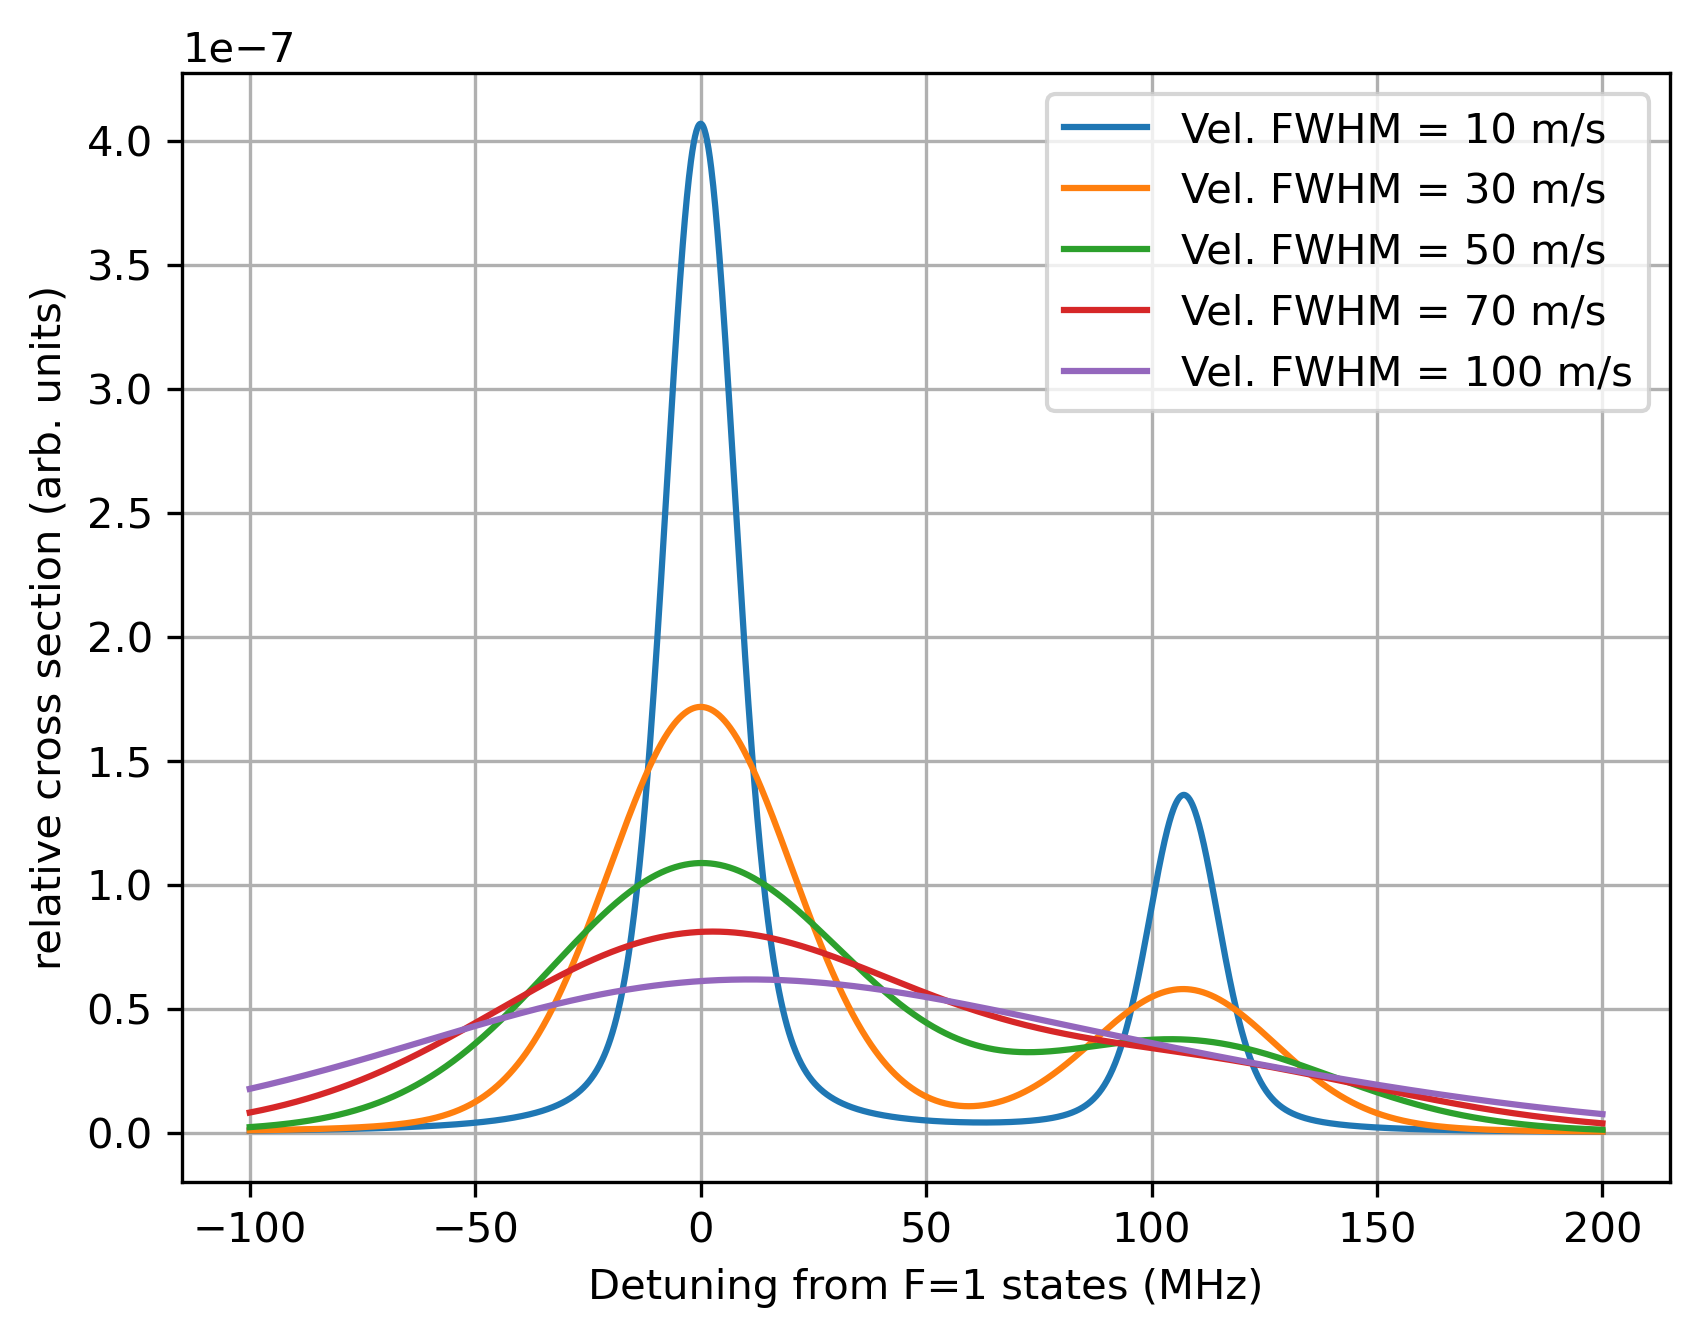

In [90]:
a_FWHM_list = np.array([10, 30, 50, 70, 100]) # m/s, full width at half maximum of velocity distribution
Delta_list = np.linspace(-100e6, 200e6, 2000) # Hz, detuning from F=1 state
plt.figure(dpi=300)

for a_FWHM in a_FWHM_list:
    a_std = a_FWHM / (2*np.sqrt(2*np.log(2))) # convert FWHM to standard deviation
    v_list = np.linspace(-a_std*6, a_std*6, 2000)
    d_v = v_list[1] - v_list[0]

    # integrate over velocity distribution to calculate Doppler broadened cross section
    cs = np.array([np.sum(cross_section(detuning)(v_list) * velocity_distribution(a_std)(v_list)) * d_v for detuning in Delta_list])
    plt.plot(Delta_list/1e6, cs, label=f'Vel. FWHM = {a_FWHM} m/s')

plt.xlabel(r'Detuning from F=1 states (MHz)')
plt.ylabel(r'relative cross section (arb. units)')
plt.legend()
plt.grid()
plt.show()

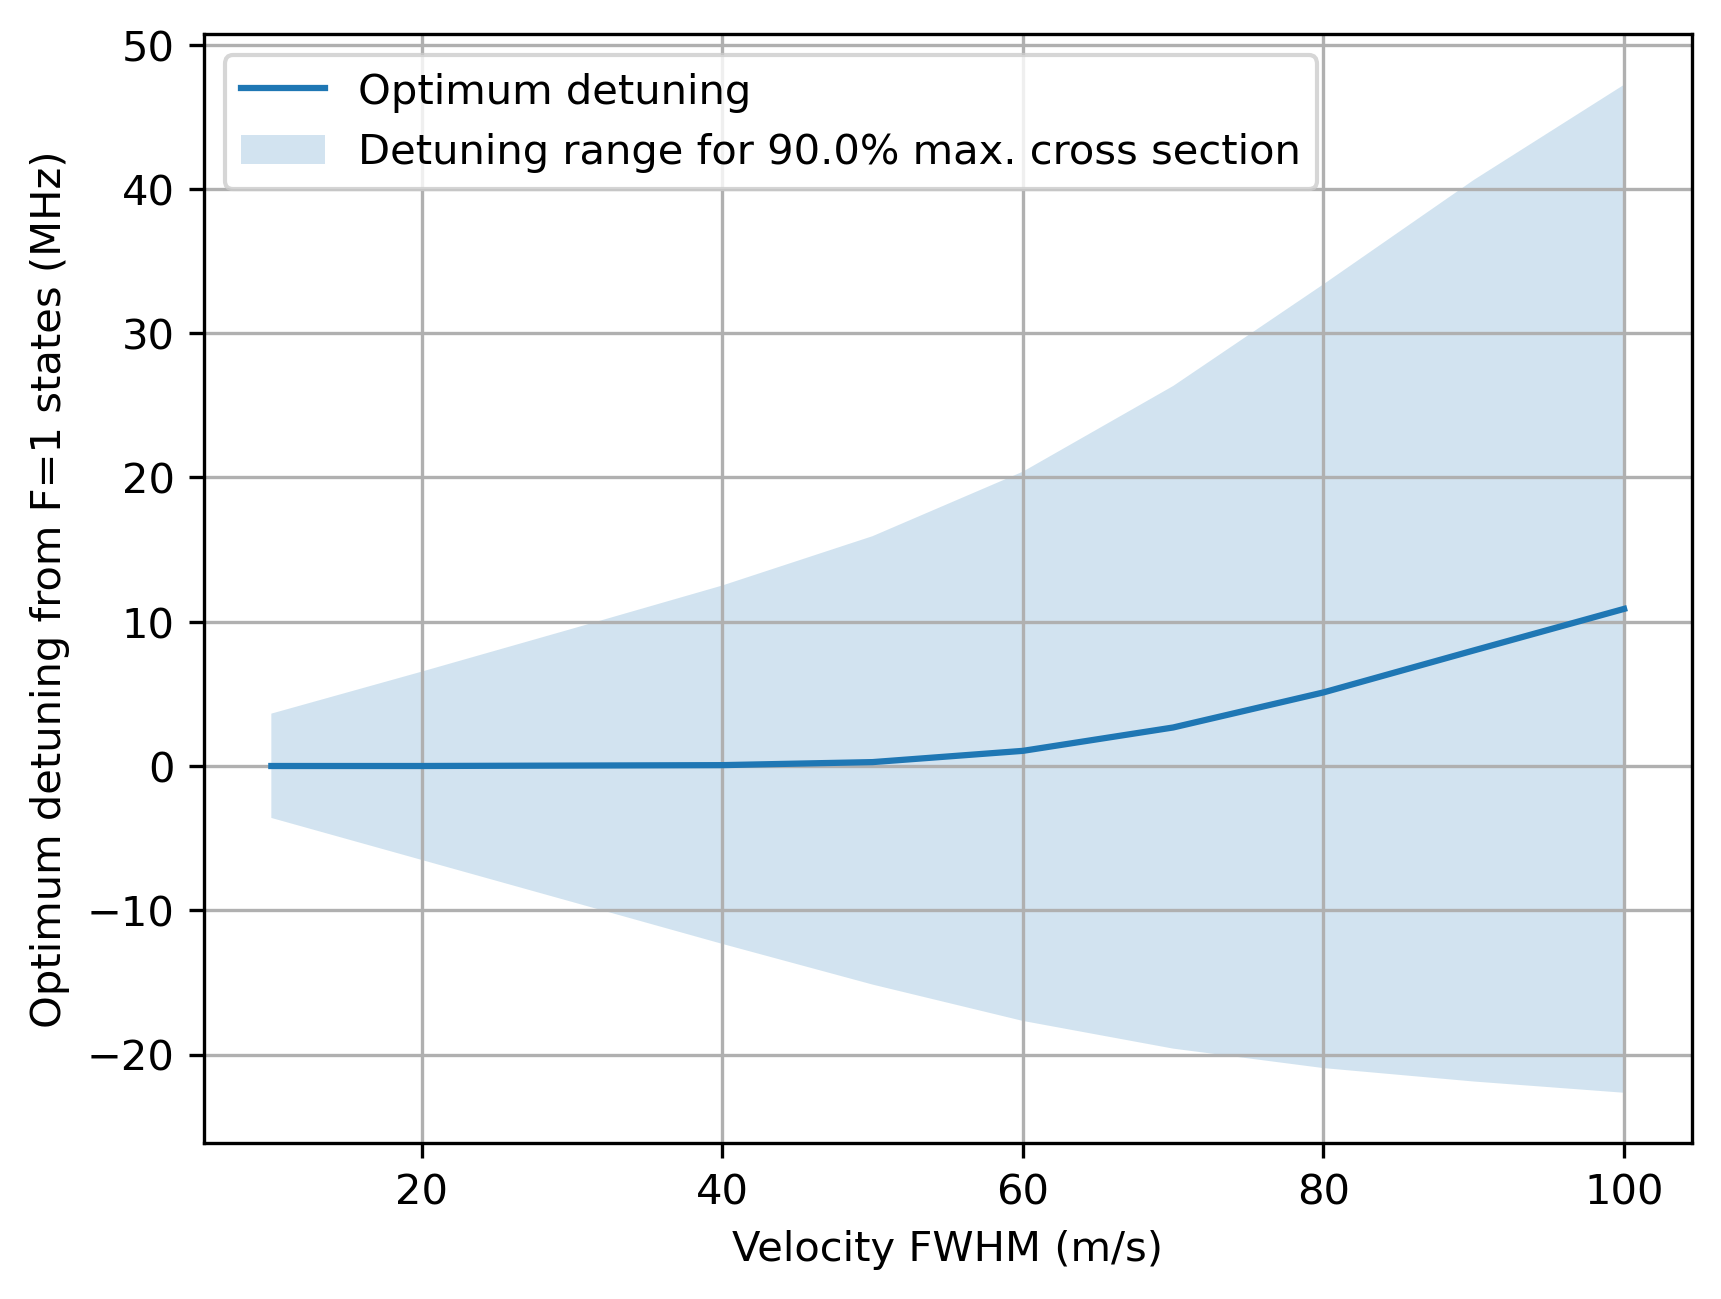

In [91]:
a_FWHM_list = np.linspace(10, 100, 10) # m/s, full width at half maximum of velocity distribution
Delta_list = np.linspace(-100e6, 200e6, 10000) # Hz, detuning from F=1 state
max_cs_detuning_list = np.empty(len(a_FWHM_list)) # a list to store optimum detuning that maximizes cross section for each velocity FWHM
cs_detuning_low_limit_list = np.empty(len(a_FWHM_list)) # a list to store lower limit of detuning range that maximizes cross section for each velocity FWHM
cs_detuning_high_limit_list = np.empty(len(a_FWHM_list)) # a list to store upper limit of detuning range that maximizes cross section for each velocity FWHM
cs_max_fraction = 0.9 # fraction of maximum cross section to be considered as the low/high limit of optimum

for i, a_FWHM in enumerate(a_FWHM_list):
    a_std = a_FWHM / (2*np.sqrt(2*np.log(2))) # convert FWHM to standard deviation
    v_list = np.linspace(-a_std*6, a_std*6, 2000)
    d_v = v_list[1] - v_list[0]

    # integrate over velocity distribution to calculate Doppler broadened cross section
    cs = np.array([np.sum(cross_section(detuning)(v_list) * velocity_distribution(a_std)(v_list)) * d_v for detuning in Delta_list])
    max_cs_index = np.argmax(cs)
    max_cs = cs[max_cs_index]
    max_cs_detuning_list[i] = Delta_list[max_cs_index]

    # find the lower limit of detuning range that maximizes cross section
    cs_low_limit_index = np.where(cs[:max_cs_index] > cs_max_fraction * max_cs)[0][0]
    cs_detuning_low_limit_list[i] = Delta_list[cs_low_limit_index]

    # find the upper limit of detuning range that maximizes cross section
    cs_high_limit_index = np.where(cs[max_cs_index:] < cs_max_fraction * max_cs)[0][0] + max_cs_index
    cs_detuning_high_limit_list[i] = Delta_list[cs_high_limit_index]
    
plt.figure(dpi=300)
plt.plot(a_FWHM_list, max_cs_detuning_list/1e6, label='Optimum detuning')
plt.fill_between(a_FWHM_list, cs_detuning_low_limit_list/1e6, cs_detuning_high_limit_list/1e6, alpha=0.2, label=f'Detuning range for {cs_max_fraction*100:.1f}% max. cross section')

plt.xlabel(r'Velocity FWHM (m/s)')
plt.ylabel(r'Optimum detuning from F=1 states (MHz)')
plt.legend()
plt.grid()
plt.show()